In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, Subset

In [ ]:
from torchvision.datasets import CIFAR10
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())


100%|██████████| 170498071/170498071 [00:01<00:00, 97649814.41it/s]


Extracting data/cifar-10-python.tar.gz to data/


In [ ]:
# Define a dictionary of models
models = {
    "Principal Component Analysis": PCA(n_components=2),
    "Isomap Embedding": Isomap(n_components=2),
    "Locally Linear Embedding": LocallyLinearEmbedding(n_components=2),
    "Multidimensional Scaling": MDS(n_components=2, normalized_stress='auto'),
    "Spectral Embedding": SpectralEmbedding(n_components=2),
    "T-distributed Stochastic Neighbor Embedding": TSNE(n_components=2),
}

In [ ]:
# Since we're only doing visualization, let's limit the number of samples
num_samples = 3000
subset = torch.utils.data.Subset(dataset, range(num_samples))

# DataLoader
trainloader = torch.utils.data.DataLoader(subset, batch_size=num_samples, shuffle=False, num_workers=2)

# Get a single batch of images
images, labels = next(iter(trainloader))
images = images.numpy()

# Preprocess the data: Flatten and normalize
x_flat = images.reshape(num_samples, -1)
y = labels.numpy()

# Convert numpy arrays to pandas DataFrame
x_df = pd.DataFrame(x_flat)
y_df = pd.DataFrame(y, columns=["Label"])

# Function to plot
def plot_embedding(X, y, title):
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(y[i] / 10.), fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    plt.title(title)




In [71]:
class_names = dataset.classes

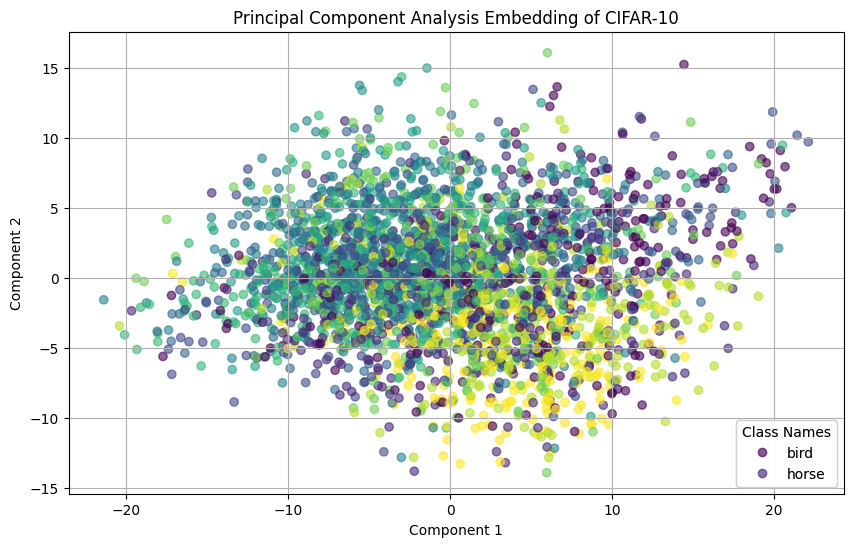

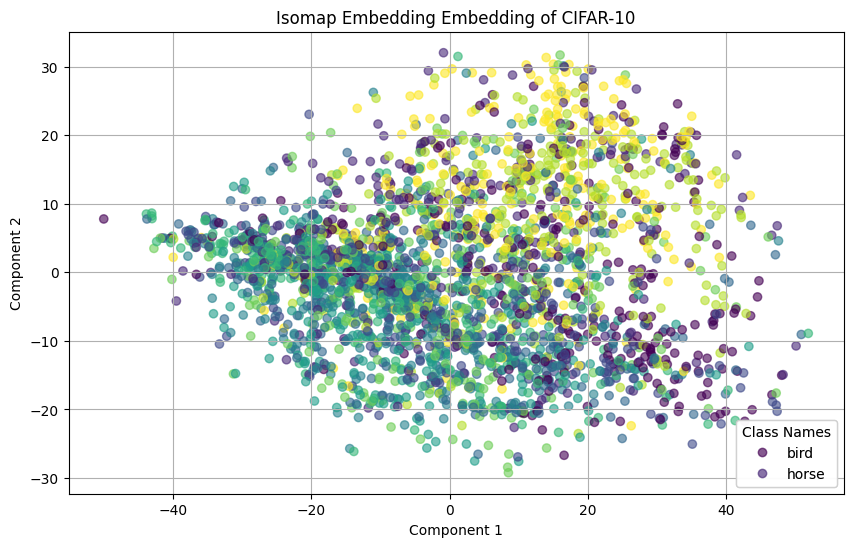

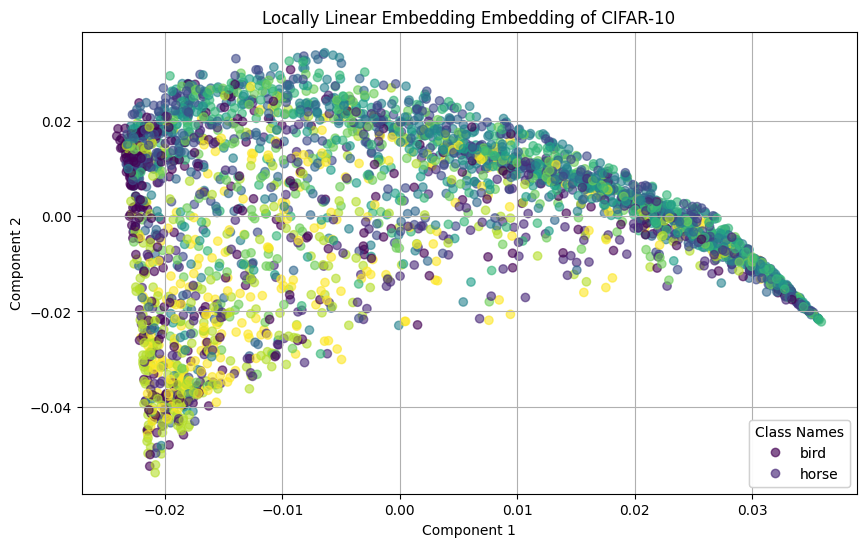

In [ ]:
# Loop through each model
for name, model in models.items():
    # Apply the model to the filtered dataset
    X_transformed = model.fit_transform(x_df)

    # Plot the embeddings with labels
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', alpha=0.6)

    # Create a custom legend with class names
    class_labels = [class_names[l] for l in range(len(class_names)) if l in classes]
    custom_legend = plt.legend(handles=scatter.legend_elements()[0], labels=class_labels, title="Class Names", loc="lower right")
    plt.gca().add_artist(custom_legend)

    plt.title(f"{name} Embedding of CIFAR-10")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

In [ ]:
# Define a function to filter the dataset by class
def filter_by_class(dataset, classes):
    indices = [i for i, (_, label) in enumerate(dataset) if label in classes]
    return Subset(dataset, indices)

# Define the classes you want to include (e.g., airplane and automobile)
classes = [2,7]
# Define class names for CIFAR-10 dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


In [ ]:
# Filter the dataset to include only the desired classes
filtered_dataset = filter_by_class(dataset, classes)

# DataLoader for batching operations
batch_size = len(filtered_dataset)  # Use the full filtered dataset for PCA
dataloader = DataLoader(filtered_dataset, batch_size=batch_size, shuffle=True)

# Get a single batch of images and labels
images, labels = next(iter(dataloader))

# Convert the images to a pandas DataFrame
images_df = pd.DataFrame(images.view(images.size(0), -1).numpy())


In [ ]:
images_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.760784,0.470588,0.392157,0.278431,0.396078,0.501961,0.478431,0.423529,0.301961,0.203922,...,0.196078,0.156863,0.117647,0.074510,0.054902,0.047059,0.047059,0.070588,0.094118,0.133333
1,0.725490,0.713726,0.717647,0.725490,0.733333,0.721569,0.705882,0.709804,0.721569,0.721569,...,0.725490,0.721569,0.721569,0.733333,0.733333,0.733333,0.725490,0.709804,0.698039,0.709804
2,0.580392,0.200000,0.227451,0.588235,0.431373,0.223529,0.494118,0.584314,0.262745,0.435294,...,0.282353,0.337255,0.337255,0.341176,0.356863,0.364706,0.360784,0.356863,0.349020,0.356863
3,0.909804,0.901961,0.901961,0.901961,0.901961,0.901961,0.901961,0.901961,0.901961,0.901961,...,0.741176,0.741176,0.745098,0.745098,0.741176,0.741176,0.725490,0.725490,0.717647,0.713726
4,0.156863,0.160784,0.184314,0.184314,0.141176,0.105882,0.109804,0.113725,0.109804,0.098039,...,0.062745,0.145098,0.133333,0.211765,0.301961,0.380392,0.549020,0.662745,0.690196,0.709804
5,0.466667,0.482353,0.345098,0.384314,0.501961,0.635294,0.529412,0.454902,0.450980,0.447059,...,0.243137,0.247059,0.254902,0.254902,0.254902,0.250980,0.254902,0.266667,0.254902,0.247059
6,0.733333,0.717647,0.717647,0.717647,0.690196,0.686275,0.666667,0.627451,0.721569,0.721569,...,0.800000,0.800000,0.807843,0.819608,0.819608,0.823529,0.827451,0.839216,0.839216,0.843137
7,0.035294,0.027451,0.086275,0.078431,0.200000,0.286275,0.286275,0.270588,0.247059,0.149020,...,0.203922,0.211765,0.211765,0.196078,0.180392,0.180392,0.192157,0.192157,0.192157,0.192157
8,0.411765,0.407843,0.431373,0.454902,0.474510,0.509804,0.490196,0.313726,0.105882,0.070588,...,0.196078,0.274510,0.360784,0.368627,0.368627,0.364706,0.356863,0.384314,0.298039,0.109804
9,0.431373,0.447059,0.454902,0.494118,0.513726,0.513726,0.533333,0.549020,0.564706,0.572549,...,0.796078,0.811765,0.796078,0.917647,0.968627,0.964706,0.968627,0.960784,0.964706,0.968627


Rerun for all the models for just 2 classes

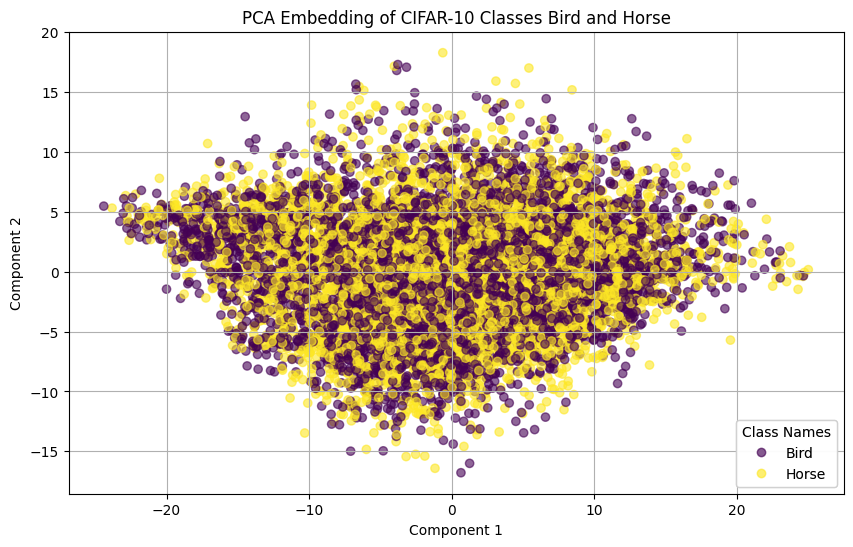

In [ ]:
# Apply PCA to the filtered dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(images_df)

# Plot the PCA embeddings with labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)

# Create a custom legend with class names
class_labels = [class_names[l] for l in range(len(class_names)) if l in classes]
custom_legend = plt.legend(handles=scatter.legend_elements()[0], labels=class_labels, title="Class Names", loc="lower right")

plt.gca().add_artist(custom_legend)
plt.title(f"PCA Embedding of CIFAR-10 Classes {class_names[classes[0]]} and {class_names[classes[1]]}")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

In [ ]:
class_labels

['Dog', 'Horse']

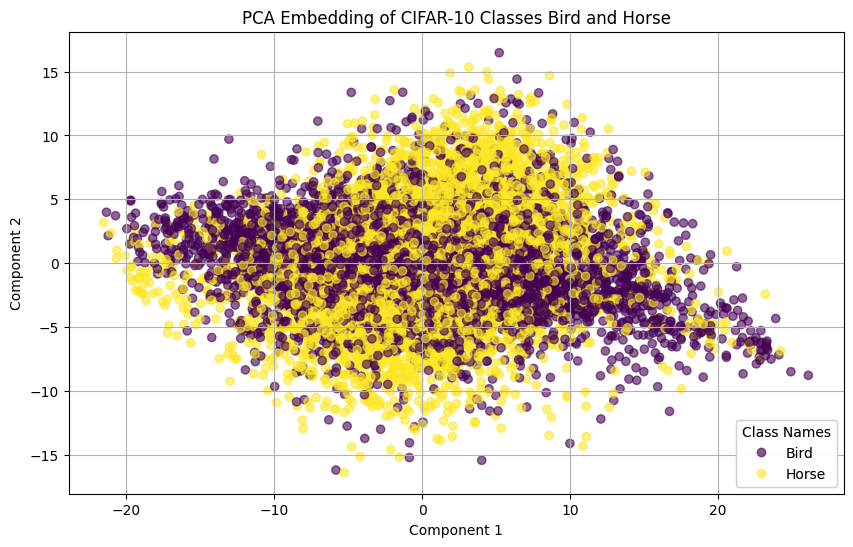

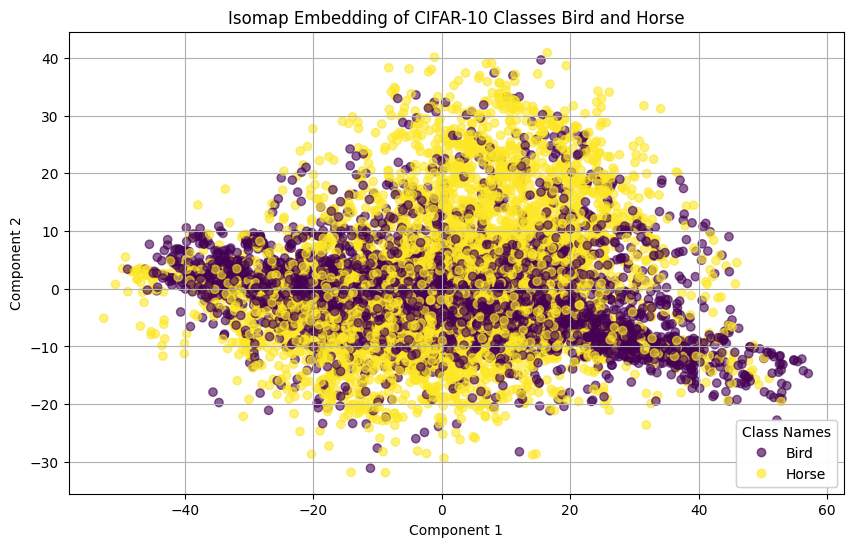

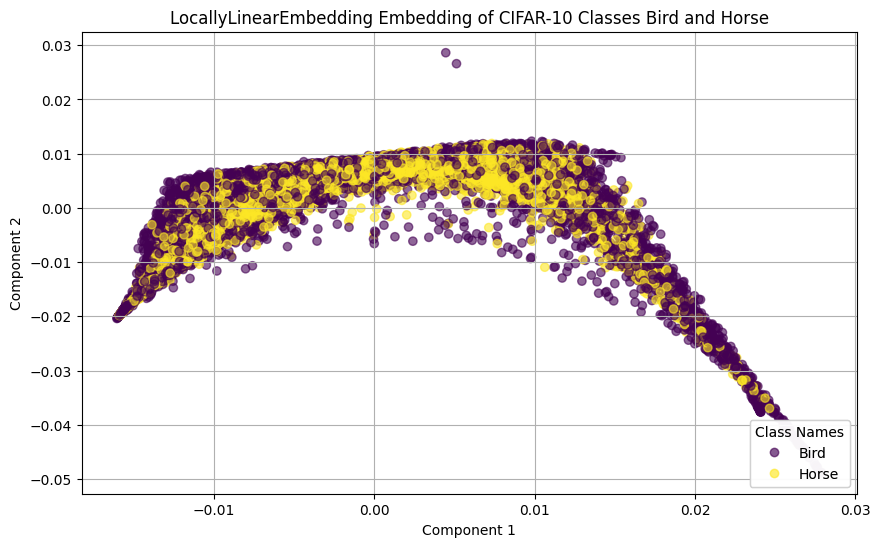

KeyboardInterrupt: 

In [ ]:
# Loop through each model
for name, model in models.items():
    # Apply the model to the filtered dataset
    X_transformed = model.fit_transform(images_df)

    # Plot the embeddings with labels
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap='viridis', alpha=0.6)

    # Create a custom legend with class names
    class_labels = [class_names[l] for l in range(len(class_names)) if l in classes]
    custom_legend = plt.legend(handles=scatter.legend_elements()[0], labels=class_labels, title="Class Names", loc="lower right")
    plt.gca().add_artist(custom_legend)

    plt.title(f"{name} Embedding of CIFAR-10 Classes {class_names[classes[0]]} and {class_names[classes[1]]}")
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()
